### Генерація даних з використанням функції

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, kk, bb, noise_level):
    xx = np.linspace(0, 10, N)
    noise = np.random.normal(0, noise_level, N)
    yy = kk * xx + bb + noise
    return xx, yy

N = 1000
kk = 2
bb = 0
noise_level = 2

xx, yy = generate_data(N, kk, bb, noise_level)

### Візуалізація даних

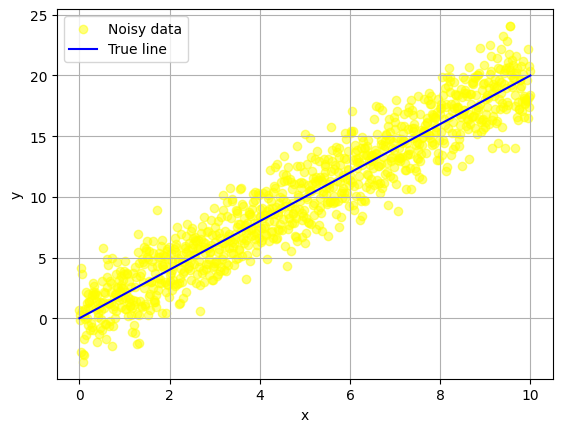

In [29]:
import matplotlib.pyplot as plt

def plot_data_and_true_line(xx, yy, kk, bb):
    plt.scatter(xx, yy, color="yellow", label='Noisy data', alpha=0.5)
    plt.plot(xx, kk * xx + bb, color='blue', label='True line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_data_and_true_line(xx, yy, kk, bb)

### Метод найменших квадратів

In [30]:
def least_squares(xx, yy):
    n = len(xx)
    sum_xx = np.dot(xx, xx)
    sum_xy = np.dot(xx, yy)
    sum_x = np.sum(xx)
    sum_y = np.sum(yy)

    kk_hat = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
    bb_hat = (sum_y - kk_hat * sum_x) / n
    return kk_hat, bb_hat

kk_hat, bb_hat = least_squares(xx, yy)

kk_np_polyfit, bb_np_polyfit = np.polyfit(xx, yy, 1)

### Візуалізація результатів

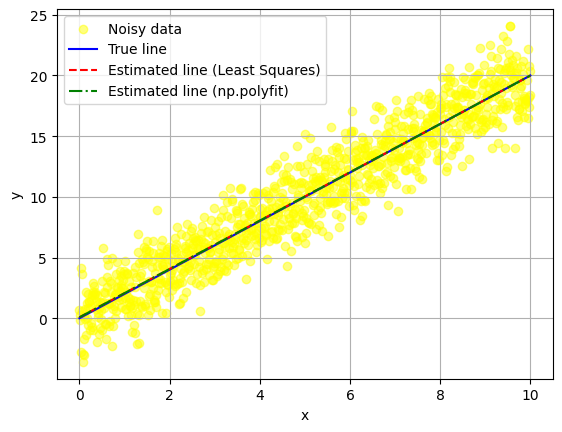

In [31]:
def plot_regression_results(xx, yy, kk, bb, kk_hat, bb_hat, kk_np_polyfit, bb_np_polyfit):
    plt.scatter(xx, yy, color="yellow", label='Noisy data', alpha=0.5)
    plt.plot(xx, kk * xx + bb, 'b-', label='True line')
    plt.plot(xx, kk_hat * xx + bb_hat, 'r--', label='Estimated line (Least Squares)')
    plt.plot(xx, kk_np_polyfit * xx + bb_np_polyfit, 'g-.', label='Estimated line (np.polyfit)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_regression_results(xx, yy, kk, bb, kk_hat, bb_hat, kk_np_polyfit, bb_np_polyfit)

### Градієнтний спуск і візуалізація похибки

Брейк на ітерації 164.
Всього виконано ітерацій: 164
3.971646232455423 2.047994280129142


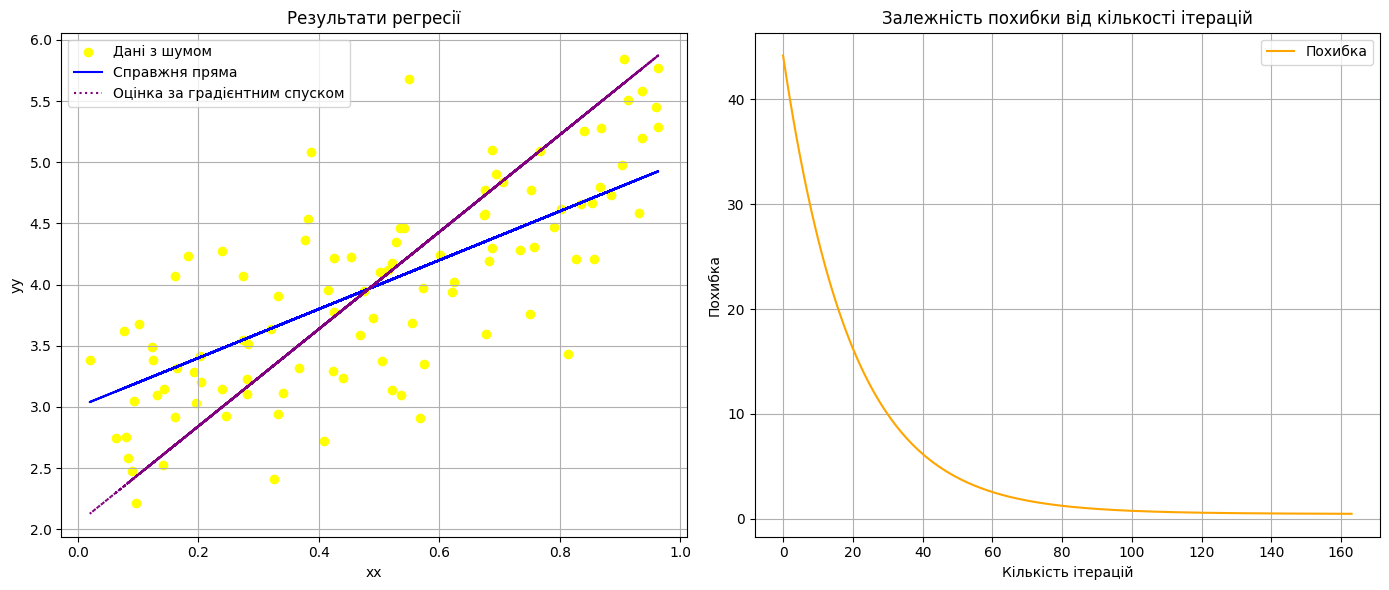

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate, n_iter, tolerance=1e-3):
    kk_hat = 7
    bb_hat = 7
    n = len(x)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")

    # Функція втрат
    def loss_function(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    errors = []
    for i in range(n_iter):
        y_pred = kk_hat * x + bb_hat
        gradient_kk = (-2/n) * np.sum(x * (y - y_pred))
        gradient_bb = (-2/n) * np.sum(y - y_pred)

        kk_hat -= learning_rate * gradient_kk
        bb_hat -= learning_rate * gradient_bb

        # Оновлення похибки
        current_error = loss_function(y, y_pred)
        errors.append(current_error)

        # Перевірка на зупинку алгоритму
        if i > 0 and abs(errors[i] - errors[i-1]) < tolerance:
            print(f"Брейк на ітерації {i+1}.")
            break

    # Виведення кількості ітерацій
    print(f"Всього виконано ітерацій: {i+1}")
    return kk_hat, bb_hat, errors

# Приклад використання функції
xx = np.random.rand(100)
yy = 2 * xx + 3 + np.random.randn(100) * 0.5
learning_rate = 0.01
n_iter = 1000

kk_gradient, bb_gradient, errors = gradient_descent(xx, yy, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

# Вивід графіка похибок
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(xx, yy, color="yellow", label='Дані з шумом')
plt.plot(xx, 2 * xx + 3, color='blue', label='Справжня пряма')
plt.plot(xx, kk_gradient * xx + bb_gradient, color='purple', linestyle=':', label='Оцінка за градієнтним спуском')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.title('Результати регресії')

plt.subplot(1, 2, 2)
plt.plot(errors, color="orange", label='Похибка')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()